In [ ]:
# !pip install xgboost

#Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import and Read Data

In [ ]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
import torch as nn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as mets


# It seems that they are labeled backwards according to their documentation. The test set should have 82k rows while the train set should have 175k. 
traindf =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML for Cyber Project/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set_nocat.csv")
testdf =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML for Cyber Project/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set_nocat.csv")

train = traindf.to_numpy()
test = testdf.to_numpy()

#remove id
traindf = traindf.drop('id', axis=1) 
testdf = testdf.drop('id', axis=1) 

# traindf_lables = traindf['label']
# testdf_lables = testdf['label']
traindf_lables = traindf['attack_cat']
testdf_lables = testdf['attack_cat']

#delete classifying data
traindf = traindf.drop('attack_cat', axis=1)
traindf = traindf.drop('label', axis=1)
testdf = testdf.drop('attack_cat', axis=1)
testdf = testdf.drop('label', axis=1)


#split Training data into X and Y
Xtrain = train[:,1:37] # remove id column
Ytrain = train[:,37] 

Xtest = test[:,1:37] # remove id column
Ytest = test[:,37]  



In [ ]:
#Visualize the train data
traindf.hist(figsize=(17,17))

In [ ]:
#Visualize the test data
testdf.hist(figsize=(17,17))

In [ ]:
normMaskTrain = (traindf_lables == "Normal")
fuzMaskTrain = (traindf_lables == "Fuzzers")
analyMaskTrain = (traindf_lables == "Analysis")
backMaskTrain = (traindf_lables == "Backdoor")
dosMaskTrain = (traindf_lables == "DoS")
expMaskTrain = (traindf_lables == "Exploits")
genMaskTrain = (traindf_lables == "Generic")
reconMaskTrain = (traindf_lables == "Reconnaissance")
shellMaskTrain = (traindf_lables == "Shellcode")
wormMaskTrain = (traindf_lables == "Worms")

# Create mask for which entries to work on
trainMask = normMaskTrain | expMaskTrain |genMaskTrain
Xtrain = Xtrain[trainMask]

traindf = traindf[trainMask]

Ytrain = Ytrain[trainMask]
Ytrain[Ytrain == "Normal"] = 0
Ytrain[Ytrain == "Fuzzers"] = 1
Ytrain[Ytrain == "Analysis"] = 2
Ytrain[Ytrain == "Backdoor"] = 3
Ytrain[Ytrain == "DoS"] = 4
Ytrain[Ytrain == "Exploits"] = 5
Ytrain[Ytrain == "Generic"] = 6
Ytrain[Ytrain == "Reconnaissance"] = 7
Ytrain[Ytrain == "Shellcode"] = 8
Ytrain[Ytrain == "Worms"] = 9

traindf_lables = traindf_lables[trainMask]
traindf_lables.replace("Normal", 0, inplace=True)
traindf_lables.replace("Fuzzers", 1, inplace=True)
traindf_lables.replace("Analysis", 2, inplace=True)
traindf_lables.replace("Backdoor", 3, inplace=True)
traindf_lables.replace("DoS", 4, inplace=True)
traindf_lables.replace("Exploits", 5, inplace=True)
traindf_lables.replace("Generic", 6, inplace=True)
traindf_lables.replace("Reconnaissance", 7, inplace=True)
traindf_lables.replace("Shellcode", 8, inplace=True)
traindf_lables.replace("Worms", 9, inplace=True)


In [ ]:
normMaskTest = (testdf_lables == "Normal")
fuzMaskTest = (testdf_lables == "Fuzzers")
analyMaskTest = (testdf_lables == "Analysis")
backMaskTest = (testdf_lables == "Backdoor")
dosMaskTest = (testdf_lables == "DoS")
expMaskTest = (testdf_lables == "Exploits")
genMaskTest = (testdf_lables == "Generic")
reconMaskTest = (testdf_lables == "Reconnaissance")
shellMaskTest = (testdf_lables == "Shellcode")
wormMaskTest = (testdf_lables == "Worms")

# Create mask for which entries to work on
testMask = normMaskTest | expMaskTest | genMaskTest

Xtest = Xtest[testMask]
testdf = testdf[testMask]

Ytest = Ytest[testMask]
Ytest[Ytest == "Normal"] = 0
Ytest[Ytest == "Fuzzers"] = 1
Ytest[Ytest == "Analysis"] = 2
Ytest[Ytest == "Backdoor"] = 3
Ytest[Ytest == "DoS"] = 4
Ytest[Ytest == "Exploits"] = 5
Ytest[Ytest == "Generic"] = 6
Ytest[Ytest == "Reconnaissance"] = 7
Ytest[Ytest == "Shellcode"] = 8
Ytest[Ytest == "Worms"] = 9


testdf_lables = testdf_lables[testMask]
testdf_lables.replace("Normal", 0, inplace=True)
testdf_lables.replace("Fuzzers", 1, inplace=True)
testdf_lables.replace("Analysis", 2, inplace=True)
testdf_lables.replace("Backdoor", 3, inplace=True)
testdf_lables.replace("DoS", 4, inplace=True)
testdf_lables.replace("Exploits", 5, inplace=True)
testdf_lables.replace("Generic", 6, inplace=True)
testdf_lables.replace("Reconnaissance", 7, inplace=True)
testdf_lables.replace("Shellcode", 8, inplace=True)
testdf_lables.replace("Worms", 9, inplace=True)


['Normal' 'Normal' 'Normal' ... 'Normal' 'Normal' 'Normal']
[0 0 0 ... 0 0 0]
0        0
1        0
2        0
3        0
4        0
        ..
82327    0
82328    0
82329    0
82330    0
82331    0
Name: attack_cat, Length: 67003, dtype: int64


# XGBoost

In [ ]:
# XGBOOST
model = XGBClassifier()
model.fit(Xtrain, Ytrain)

XGBClassifier(objective='multi:softprob')

Accuracy: 95.45%
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     37000
         5.0       0.81      0.97      0.88     11132
         6.0       1.00      0.96      0.98     18871

    accuracy                           0.95     67003
   macro avg       0.93      0.96      0.94     67003
weighted avg       0.96      0.95      0.96     67003

Normal = 0    Fuzzers = 1    Analysis = 2    Backdoor = 3    DoS = 4    Exploits = 5 
Generic = 6    Reconnaissance = 7    Shellcode = 8    Worms = 9


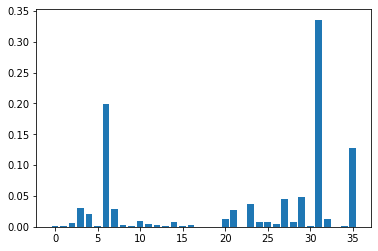

In [ ]:
# print(model.feature_importances_)

y_pred = model.predict(Xtest)
# print(y_pred)
# print(Ytest)
predictions = [round(value) for value in y_pred]
# print(predictions)

Ytest = Ytest.astype('float')

accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# print(f1_score(Ytest, predictions))
print(classification_report(Ytest,predictions))
print("Normal =", 0, "   Fuzzers =", 1, "   Analysis =", 2, "   Backdoor =", 3, "   DoS =", 4, "   Exploits =", 5, "\nGeneric =", 6, "   Reconnaissance =", 7, "   Shellcode =", 8, "   Worms =", 9)

plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

#remove only keep top 3 

In [ ]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

#selecting the features
bestThreshold = 0.0
bestAcc = 0.0
bestN = 0

thresholds = sort(model.feature_importances_)
print(thresholds)

 
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(Xtrain)
	# train model
	selection_model = XGBClassifier()
	# selection_model = RandomForestClassifier(max_depth=2, random_state=0)
	%time selection_model.fit(select_X_train, Ytrain)
	# eval model
	select_X_test = selection.transform(Xtest)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	
	accuracy = accuracy_score(Ytest, predictions)
	if accuracy >= bestAcc:
		bestAcc = accuracy
		bestThreshold = thresh
		bestN = select_X_train.shape[1]
	print(classification_report(Ytest,predictions))
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))


print("Best Accuracy=%.2f%%, Best N=%d, Threshold=%.3f" % (bestAcc*100.0, bestN, bestThreshold))


[0.0000000e+00 0.0000000e+00 1.9479725e-04 3.3108634e-04 4.5649050e-04
 6.2389573e-04 6.8648177e-04 1.1235730e-03 1.2149664e-03 1.2480399e-03
 1.3550825e-03 1.3863370e-03 1.9410467e-03 2.3902759e-03 3.2641746e-03
 3.6658379e-03 3.8683368e-03 4.8685479e-03 6.3580563e-03 7.0599322e-03
 7.2080838e-03 7.2195963e-03 7.9380777e-03 9.5341904e-03 1.2459937e-02
 1.2892747e-02 2.0511359e-02 2.6896603e-02 2.9370632e-02 3.0837227e-02
 3.6561612e-02 4.4406794e-02 4.8723351e-02 1.2823379e-01 1.9927140e-01
 3.3589762e-01]
CPU times: user 49.1 s, sys: 58.5 ms, total: 49.2 s
Wall time: 51 s
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     37000
         5.0       0.81      0.97      0.88     11132
         6.0       1.00      0.96      0.98     18871

    accuracy                           0.95     67003
   macro avg       0.93      0.96      0.94     67003
weighted avg       0.96      0.95      0.96     67003

Thresh=0.000, n=36, Accuracy: 95.45%
C

#PCA

[2.95253490e-01 1.08719192e-01 9.24555777e-02 8.06191083e-02
 6.04235568e-02 5.06637723e-02 3.74088076e-02 3.41568978e-02
 2.63659669e-02 2.43812164e-02 2.36063263e-02 2.17295879e-02
 1.97477396e-02 1.68946383e-02 1.60421441e-02 1.47555668e-02
 1.08572772e-02 1.02486208e-02 9.37591006e-03 7.86036909e-03
 7.40635378e-03 6.67352971e-03 6.48078670e-03 5.60916840e-03
 3.94569463e-03 3.78584904e-03 1.99029985e-03 7.53144944e-04
 5.37751598e-04 4.28765411e-04 4.09350191e-04 1.81187233e-04
 1.80993276e-04 3.55177308e-05 1.58420155e-05 6.41783766e-32]


<BarContainer object of 36 artists>

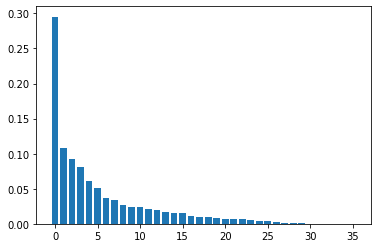

In [ ]:
#normalize features
sc = StandardScaler()
PCA_train = sc.fit_transform(traindf)
PCA_test = sc.transform(testdf)

#fit pca
pca = PCA()
PCA_train = pca.fit_transform(PCA_train)
PCA_test = pca.transform(PCA_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

plt.bar(range(len(explained_variance)), explained_variance)


[0.29525349 0.10871919 0.09245558 0.08061911 0.06042356 0.05066377
 0.03740881 0.0341569  0.02636597 0.02438122 0.02360633 0.02172959
 0.01974774 0.01689464 0.01604214 0.01475557 0.01085728 0.01024862
 0.00937591 0.00786037]


Text(0, 0.5, 'Cumulative explained variance')

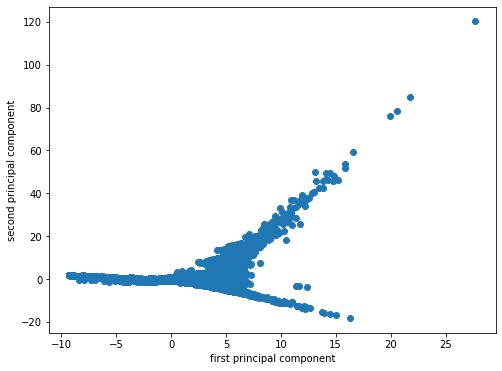

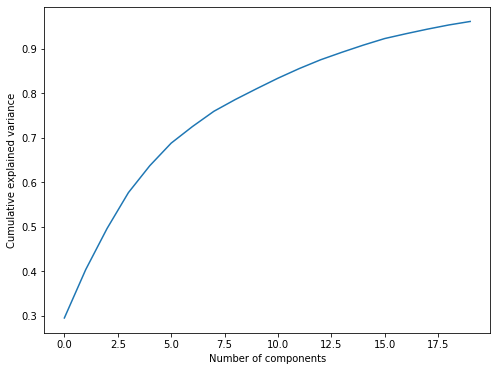

In [ ]:
#From Vazgen to visualize PCA #component and variance
pca = PCA(n_components=20)
pca_transformed = pca.fit_transform(PCA_train) # it should be normalized, and without label feature

plt.figure(figsize=(8,6))
plt.scatter(pca_transformed[:,0],pca_transformed[:,1])
plt.xlabel('first principal component')
plt.ylabel('second principal component')

print(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

CPU times: user 1.04 s, sys: 643 ms, total: 1.68 s
Wall time: 1.6 s
[0.29525349 0.10871919 0.09245558 0.08061911 0.06042356 0.05066377
 0.03740881 0.0341569  0.02636595 0.02438112 0.02360623 0.02172947
 0.01974765]


<BarContainer object of 13 artists>

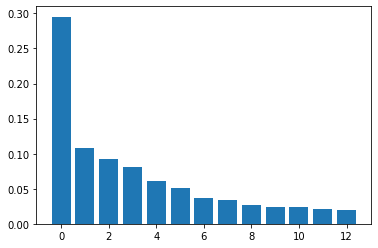

In [ ]:
#normalize features
sc = StandardScaler()
PCA_train = sc.fit_transform(traindf)
PCA_test = sc.transform(testdf)

#fit pca
pca = PCA(n_components=13)
# pca = PCA()
%time PCA_train = pca.fit_transform(PCA_train)
PCA_test = pca.transform(PCA_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

plt.bar(range(len(explained_variance)), explained_variance)

In [ ]:
#Can we make this XGBoost instead of RF to compare better?
# rf = RandomForestClassifier(max_depth=2, random_state=0)
rf = XGBClassifier()
%time rf.fit(PCA_train, traindf_lables)

rf_preds = rf.predict(PCA_test)
print(classification_report(Ytest,predictions))


CPU times: user 37.4 s, sys: 46.7 ms, total: 37.4 s
Wall time: 38.4 s
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



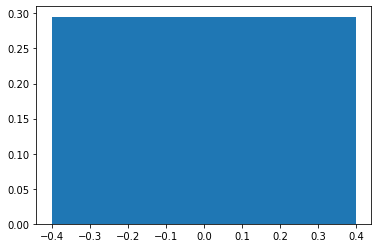

PCA with  1  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



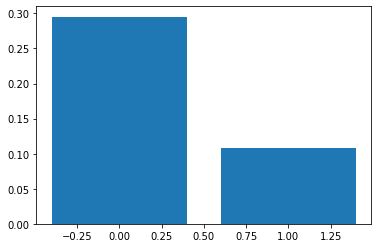

PCA with  2  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



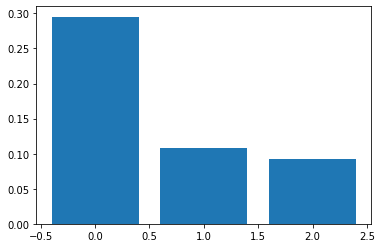

PCA with  3  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



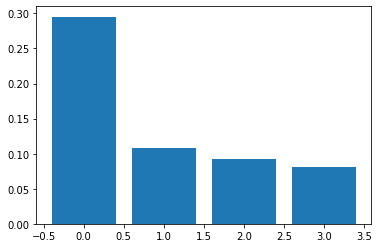

PCA with  4  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



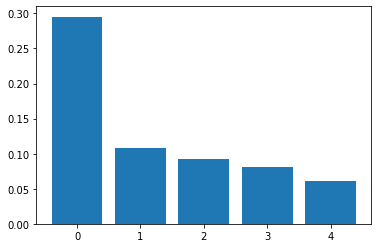

PCA with  5  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



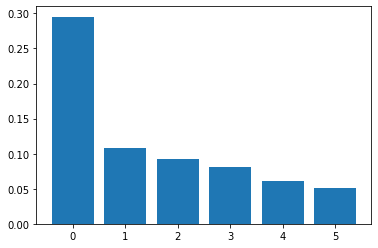

PCA with  6  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



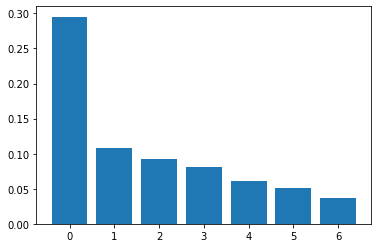

PCA with  7  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



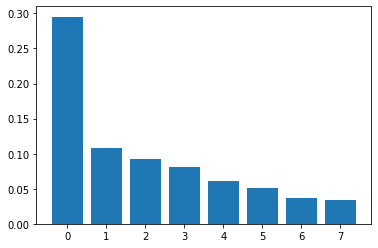

PCA with  8  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



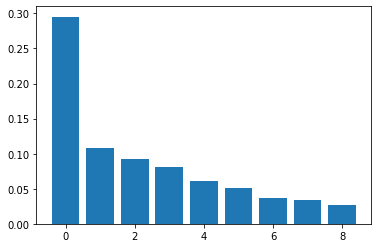

PCA with  9  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



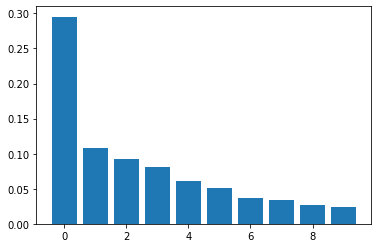

PCA with  10  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



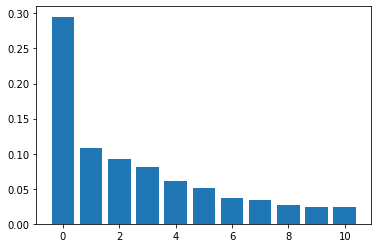

PCA with  11  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



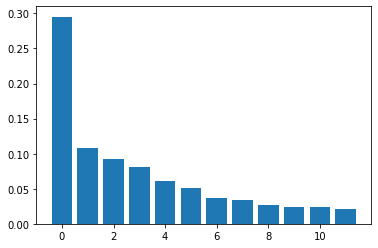

PCA with  12  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



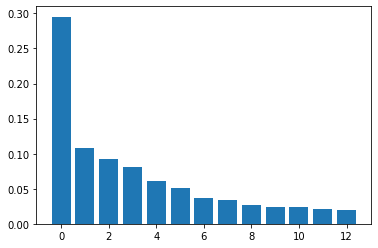

PCA with  13  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



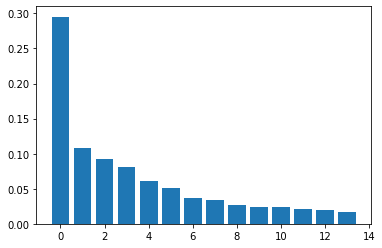

PCA with  14  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



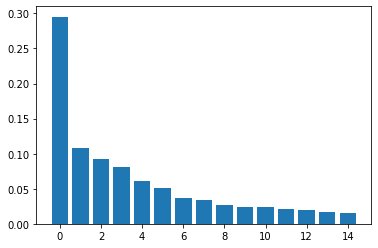

PCA with  15  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



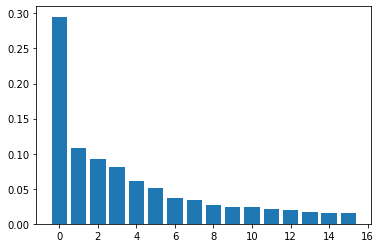

PCA with  16  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



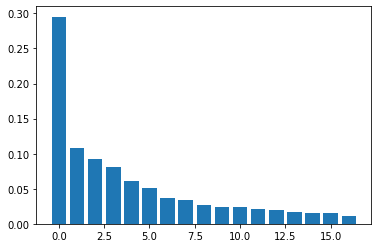

PCA with  17  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



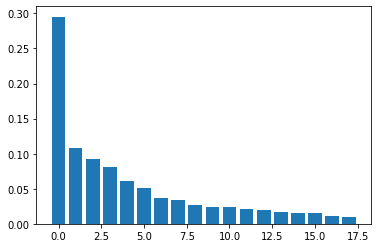

PCA with  18  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



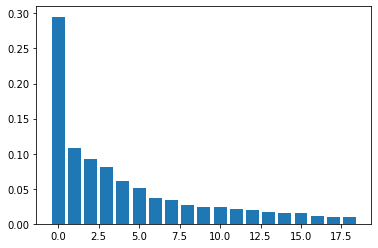

PCA with  19  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



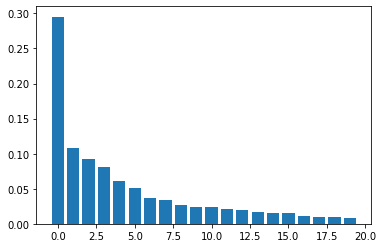

PCA with  20  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



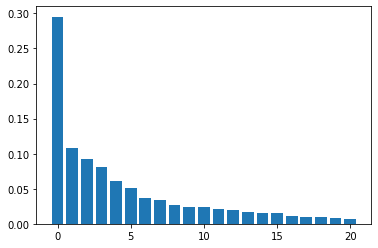

PCA with  21  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



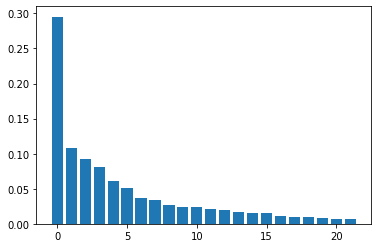

PCA with  22  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



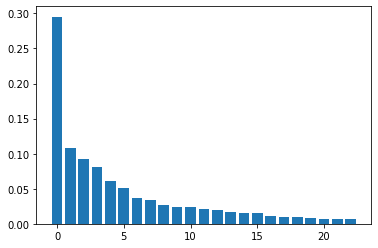

PCA with  23  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



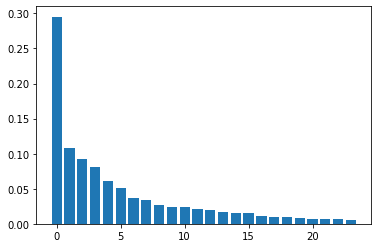

PCA with  24  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



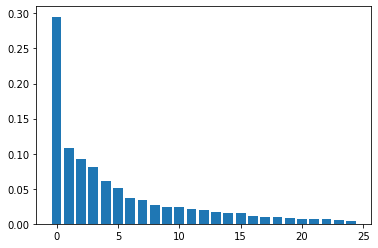

PCA with  25  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



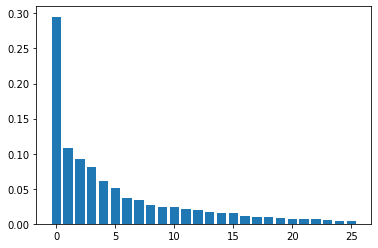

PCA with  26  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



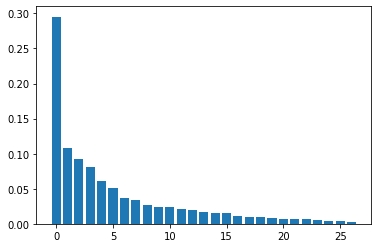

PCA with  27  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



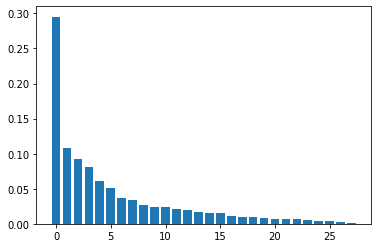

PCA with  28  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



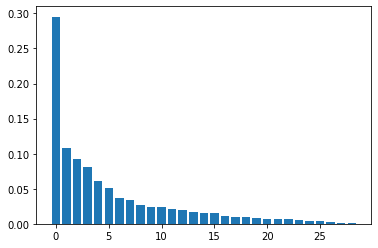

PCA with  29  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



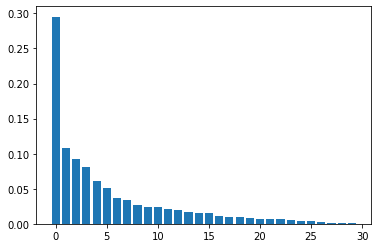

PCA with  30  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



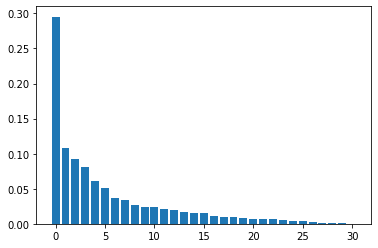

PCA with  31  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



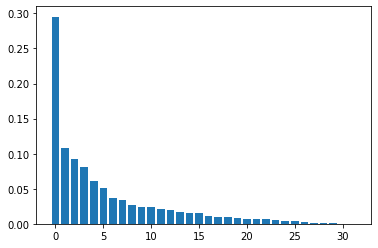

PCA with  32  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



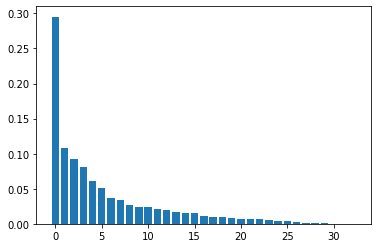

PCA with  33  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



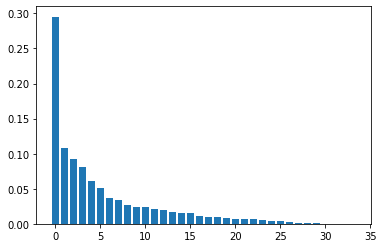

PCA with  34  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



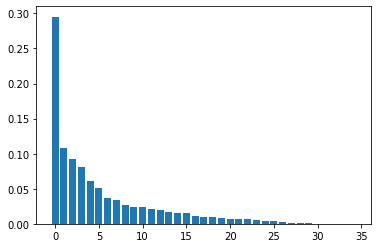

PCA with  35  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



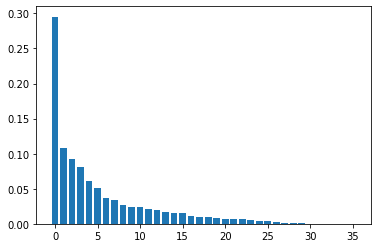

PCA with  36  features:
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     37000
         5.0       0.18      0.19      0.19     11132
         6.0       0.96      0.58      0.72     18871

    accuracy                           0.71     67003
   macro avg       0.64      0.57      0.59     67003
weighted avg       0.73      0.71      0.70     67003



In [ ]:
for i in range(1, 37):
  pca = None
  #normalize features
  sc = StandardScaler()
  PCA_train = sc.fit_transform(traindf)
  PCA_test = sc.transform(testdf)

  #fit pca
  pca = PCA(n_components=i)
  PCA_train = pca.fit_transform(PCA_train)
  PCA_test = pca.transform(PCA_test)
  explained_variance = pca.explained_variance_ratio_
  plt.bar(range(len(explained_variance)), explained_variance)
  plt.show()

  # rf = RandomForestClassifier(max_depth=2, random_state=0)
  rf = XGBClassifier()
  rf.fit(PCA_train, traindf_lables)
  rf_preds = rf.predict(PCA_test)
  print("PCA with ", i, " features:")
  print(classification_report(Ytest,predictions))
